In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [4]:
df = pd.read_csv('loan_data.csv')

In [5]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [8]:
df.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [12]:
encoder = LabelEncoder()
scaler = StandardScaler()

In [17]:
df['person_gender'] = encoder.fit_transform(df['person_gender'])
df['person_education'] = encoder.fit_transform(df['person_education'])
df['person_home_ownership'] = encoder.fit_transform(df['person_home_ownership'])
df['loan_intent'] = encoder.fit_transform(df['loan_intent'])
df['previous_loan_defaults_on_file'] = encoder.fit_transform(df['previous_loan_defaults_on_file'])

In [18]:
df.head(10)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,4,71948.0,0,3,35000.0,4,16.02,0.49,3.0,561,0,1
1,21.0,0,3,12282.0,0,2,1000.0,1,11.14,0.08,2.0,504,1,0
2,25.0,0,3,12438.0,3,0,5500.0,3,12.87,0.44,3.0,635,0,1
3,23.0,0,1,79753.0,0,3,35000.0,3,15.23,0.44,2.0,675,0,1
4,24.0,1,4,66135.0,1,3,35000.0,3,14.27,0.53,4.0,586,0,1
5,21.0,0,3,12951.0,0,2,2500.0,5,7.14,0.19,2.0,532,0,1
6,26.0,0,1,93471.0,1,3,35000.0,1,12.42,0.37,3.0,701,0,1
7,24.0,0,3,95550.0,5,3,35000.0,3,11.11,0.37,4.0,585,0,1
8,24.0,0,0,100684.0,3,3,35000.0,4,8.90,0.35,2.0,544,0,1
9,21.0,0,3,12739.0,0,2,1600.0,5,14.74,0.13,3.0,640,0,1


In [19]:
X = df.drop(['loan_status'],axis=1)
y = df['loan_status']

In [20]:
X.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file
0,22.0,0,4,71948.0,0,3,35000.0,4,16.02,0.49,3.0,561,0
1,21.0,0,3,12282.0,0,2,1000.0,1,11.14,0.08,2.0,504,1
2,25.0,0,3,12438.0,3,0,5500.0,3,12.87,0.44,3.0,635,0
3,23.0,0,1,79753.0,0,3,35000.0,3,15.23,0.44,2.0,675,0
4,24.0,1,4,66135.0,1,3,35000.0,3,14.27,0.53,4.0,586,0


In [21]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: loan_status, dtype: int64

In [22]:
X = scaler.fit_transform(X)

In [24]:
X = pd.DataFrame(X)

In [25]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.953538,-1.110069,1.525264,-0.104090,-0.892284,0.904822,4.024953,0.852919,1.683039,4.016394,-0.739109,-1.419814,-1.016040
1,-1.118963,-1.110069,0.849192,-0.846005,-0.892284,0.210609,-1.359209,-0.882904,0.044782,-0.684829,-0.996863,-2.549975,0.984213
2,-0.457264,-1.110069,0.849192,-0.844065,-0.397517,-1.177817,-0.646600,0.274312,0.625557,3.443074,-0.739109,0.047412,-1.016040
3,-0.788113,-1.110069,-0.502953,-0.007039,-0.892284,0.904822,4.024953,0.274312,1.417829,3.443074,-0.996863,0.840507,-1.016040
4,-0.622689,0.900845,1.525264,-0.176371,-0.727362,0.904822,4.024953,0.274312,1.095549,4.475050,-0.481354,-0.924130,-1.016040


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [31]:
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)
y_preds = clf.predict(X_test)
acc = accuracy_score(y_test, y_preds)

In [33]:
print(f"Accuracy : {acc*100:.2f}%")

Accuracy : 88.99%


In [56]:
class_rep = classification_report(y_test,y_preds)
print(class_rep)

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      6990
           1       0.77      0.73      0.75      2010

    accuracy                           0.89      9000
   macro avg       0.85      0.83      0.84      9000
weighted avg       0.89      0.89      0.89      9000



In [57]:
conf_mat = confusion_matrix(y_test,y_preds)
print(conf_mat)

[[6551  439]
 [ 552 1458]]


In [49]:
new_data = np.array([[22.0,'male','Master',80000.0,0,'OWN',55000.0,'PERSONAL',22.02,0.78,7.0,700,'Yes']])
new_df = pd.DataFrame(new_data)

In [50]:
new_df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,22.0,male,Master,80000.0,0,OWN,55000.0,PERSONAL,22.02,0.78,7.0,700,Yes


In [51]:
new_df[1] = encoder.fit_transform(new_df[1])
new_df[2] = encoder.fit_transform(new_df[2])
new_df[5] = encoder.fit_transform(new_df[5])
new_df[7] = encoder.fit_transform(new_df[7])
new_df[12] = encoder.fit_transform(new_df[12])

In [52]:
new_df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,22.0,0,0,80000.0,0,0,55000.0,0,22.02,0.78,7.0,700,0


In [54]:
res = clf.predict(new_df)
if res == 0:
    pred = 'Not eligible'
else:
    pred = 'Eligible'

print("Prediction : ",pred)

Prediction :  Not eligible


In [65]:
gend = df['person_gender'].to_numpy()

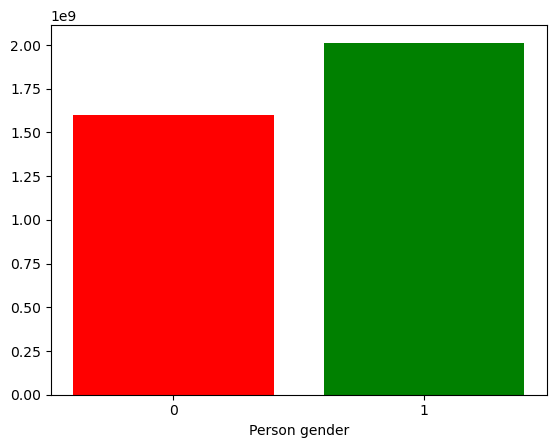

In [69]:
gender_inc = df.groupby('person_gender')['person_income'].sum()
plt.bar(gender_inc.index, gender_inc.values, color=['red','green'])
plt.xticks(ticks=range(len(gender_inc.index)), labels=gender_inc.index)
plt.xlabel('Person gender')
plt.show()